## The Sojourn Times

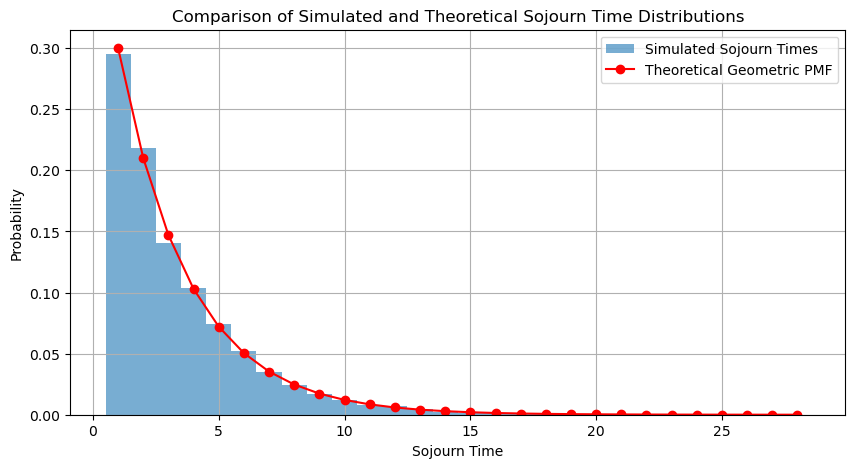

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def generate_sojourn_times(transition_matrix, state, num_samples=1000):
    """
    Generates sojourn times for a given state in a Markov chain.
    
    Parameters:
    transition_matrix (np.array): Square transition probability matrix.
    state (int): The state for which sojourn times are calculated.
    num_samples (int): Number of samples to generate.
    
    Returns:
    np.array: Array of sojourn times.
    """
    pii = transition_matrix[state, state]  # Probability of staying in the state
    sojourn_times = np.random.geometric(1 - pii, size=num_samples)
    return sojourn_times

def plot_sojourn_distribution(sojourn_times, pii):
    """
    Plots the histogram of sojourn times and compares with the theoretical geometric distribution.
    """
    plt.figure(figsize=(10, 5))
    
    # Histogram of simulated sojourn times
    bins = np.arange(1, max(sojourn_times) + 2) - 0.5
    plt.hist(sojourn_times, bins=bins, density=True, alpha=0.6, label='Simulated Sojourn Times')
    
    # Theoretical geometric distribution
    x = np.arange(1, max(sojourn_times) + 1)
    pmf = (1 - pii) * (pii ** (x - 1))
    plt.plot(x, pmf, 'ro-', label='Theoretical Geometric PMF')
    
    plt.xlabel('Sojourn Time')
    plt.ylabel('Probability')
    plt.title('Comparison of Simulated and Theoretical Sojourn Time Distributions')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define a transition matrix for a simple Markov chain
    transition_matrix = np.array([
        [0.7, 0.3],
        [0.4, 0.6]
    ])
    
    state = 0  # State for which we analyze sojourn times
    num_samples = 10000  # Number of sojourn time samples
    
    # Generate sojourn times
    sojourn_times = generate_sojourn_times(transition_matrix, state, num_samples)
    
    # Plot distribution
    plot_sojourn_distribution(sojourn_times, transition_matrix[state, state])


## Example of The Sojourn Times - Sleeping Pattern

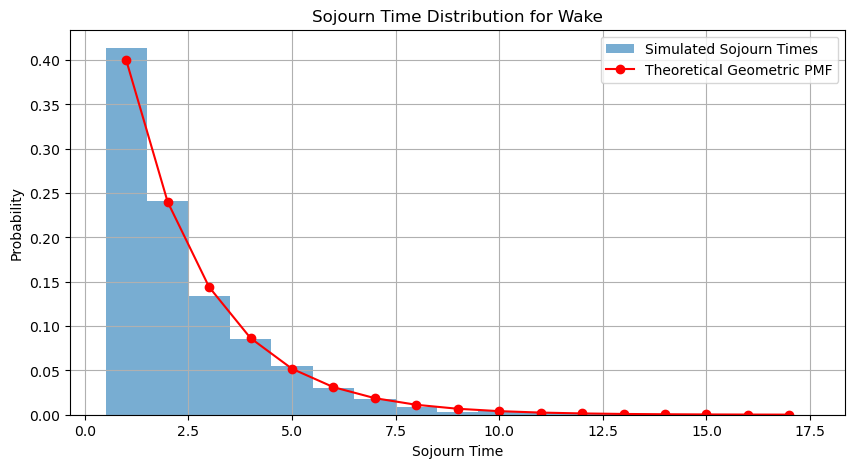

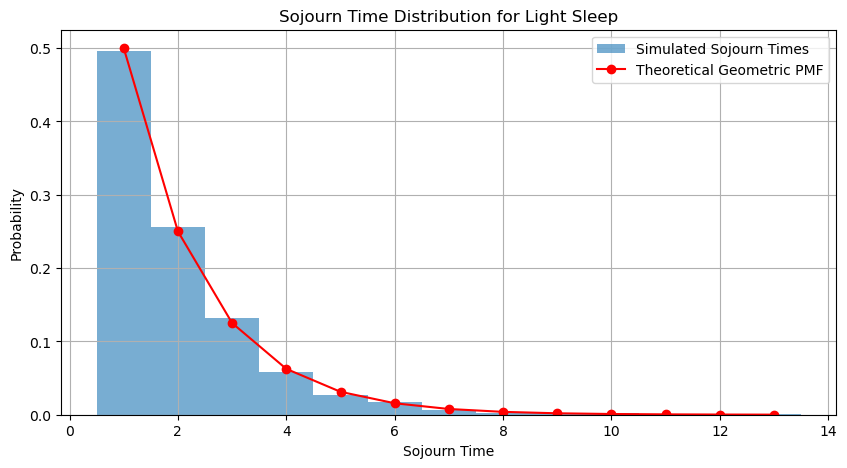

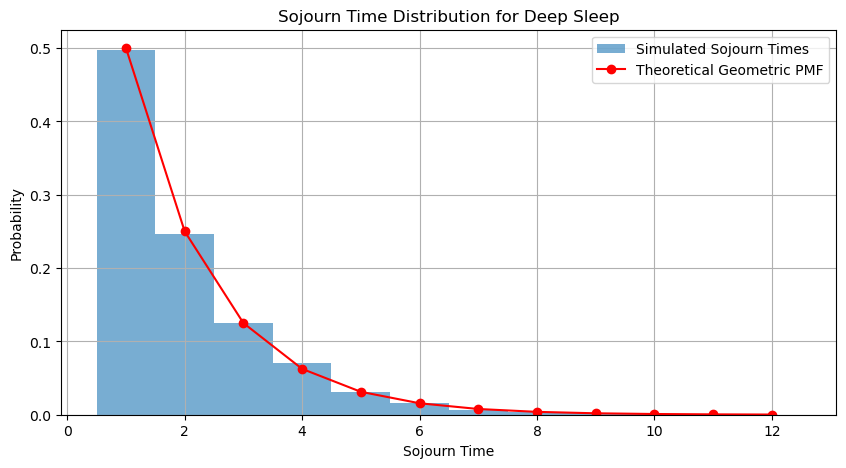

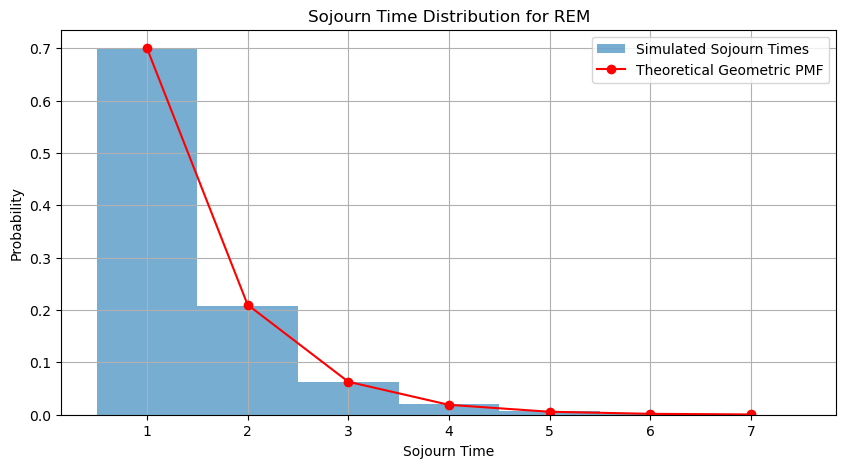

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define Sleep State Markov Chain (Wake, Light Sleep, Deep Sleep, REM, Wake)
sleep_states = ["Wake", "Light Sleep", "Deep Sleep", "REM"]
n_states = len(sleep_states)

# Transition probability matrix (example values)
transition_matrix = np.array([
    [0.6, 0.3, 0.1, 0.0],  # Wake
    [0.2, 0.5, 0.2, 0.1],  # Light Sleep
    [0.1, 0.3, 0.5, 0.1],  # Deep Sleep
    [0.2, 0.2, 0.3, 0.3]   # REM
])

def generate_sojourn_times(transition_matrix, state, num_samples=1000):
    """
    Generates sojourn times for a given sleep state in the Markov chain.
    
    Parameters:
    transition_matrix (np.array): Square transition probability matrix.
    state (int): The state for which sojourn times are calculated.
    num_samples (int): Number of samples to generate.
    
    Returns:
    np.array: Array of sojourn times.
    """
    pii = transition_matrix[state, state]  # Probability of staying in the state
    sojourn_times = np.random.geometric(1 - pii, size=num_samples)
    return sojourn_times

def plot_sojourn_distribution(sojourn_times, pii, state_name):
    """
    Plots the histogram of sojourn times and compares with the theoretical geometric distribution.
    """
    plt.figure(figsize=(10, 5))
    
    # Histogram of simulated sojourn times
    bins = np.arange(1, max(sojourn_times) + 2) - 0.5
    plt.hist(sojourn_times, bins=bins, density=True, alpha=0.6, label='Simulated Sojourn Times')
    
    # Theoretical geometric distribution
    x = np.arange(1, max(sojourn_times) + 1)
    pmf = (1 - pii) * (pii ** (x - 1))
    plt.plot(x, pmf, 'ro-', label='Theoretical Geometric PMF')
    
    plt.xlabel('Sojourn Time')
    plt.ylabel('Probability')
    plt.title(f'Sojourn Time Distribution for {state_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Simulate sojourn times for each sleep state
if __name__ == "__main__":
    num_samples = 5000  # Number of sojourn time samples
    
    for state in range(n_states):
        sojourn_times = generate_sojourn_times(transition_matrix, state, num_samples)
        plot_sojourn_distribution(sojourn_times, transition_matrix[state, state], sleep_states[state])
